In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    ConfusionMatrixDisplay, f1_score, precision_score, recall_score
)
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.naive_bayes import MultinomialNB


In [5]:

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/data')  # Replace with actual path


In [6]:

# Remove duplicate text entries with different emotions
data = data.drop_duplicates(subset='Text', keep='first')


In [7]:

# Split features and labels
texts = data['Text']
emotions = data['Emotion']


In [8]:

# Get unique emotions and their counts
emotion_counts = Counter(emotions)
colors = sns.color_palette('Set3', len(emotion_counts))


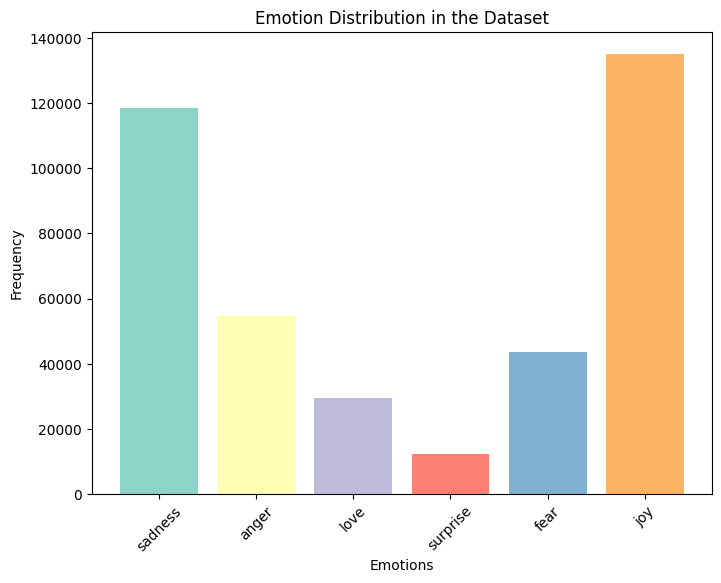

In [9]:

# Plot emotion distribution
plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color=colors)
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.title('Emotion Distribution in the Dataset')
plt.xticks(rotation=45)
plt.show()


In [10]:

# Encode emotions
label_encoder = LabelEncoder()
emotions_encoded = label_encoder.fit_transform(emotions)


In [11]:

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, emotions_encoded, test_size=0.2, random_state=42)


In [12]:

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [13]:

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_vectorized, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:37:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [14]:

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=25, random_state=42)
rf_model.fit(X_train_vectorized, y_train)


RandomForestClassifier(n_estimators=25, random_state=42)

In [24]:
# Train Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)


MultinomialNB()

In [25]:
# Make predictions for Naive Bayes
y_pred_nb = nb_model.predict(X_test_vectorized)

In [27]:

# Compute accuracy for each model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_xgb = accuracy_score(y_test, xgb_model.predict(X_test_vectorized))
accuracy_rf = accuracy_score(y_test, rf_model.predict(X_test_vectorized))

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"Random Forest Accuracy: {accuracy_rf}")


Naive Bayes Accuracy: 0.7502824858757062
XGBoost Accuracy: 0.9236716815844601
Random Forest Accuracy: 0.9066463530756046


In [29]:

# Classification reports
report_nb = classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_)
report_xgb = classification_report(y_test, xgb_model.predict(X_test_vectorized), target_names=label_encoder.classes_)
report_rf = classification_report(y_test, rf_model.predict(X_test_vectorized), target_names=label_encoder.classes_)

print("Naive Bayes Classification Report:\n", report_nb)
print("XGBoost Classification Report:\n", report_xgb)
print("Random Forest Classification Report:\n", report_rf)


Naive Bayes Classification Report:
               precision    recall  f1-score   support

       anger       0.96      0.55      0.70     10952
        fear       0.97      0.39      0.55      8779
         joy       0.70      0.98      0.81     26943
        love       0.99      0.15      0.26      5910
     sadness       0.74      0.95      0.83     23713
    surprise       1.00      0.04      0.07      2468

    accuracy                           0.75     78765
   macro avg       0.89      0.51      0.54     78765
weighted avg       0.81      0.75      0.71     78765

XGBoost Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.91      0.92     10952
        fear       0.90      0.90      0.90      8779
         joy       0.93      0.93      0.93     26943
        love       0.82      0.93      0.87      5910
     sadness       0.97      0.93      0.95     23713
    surprise       0.78      0.92      0.84      2468

    accur

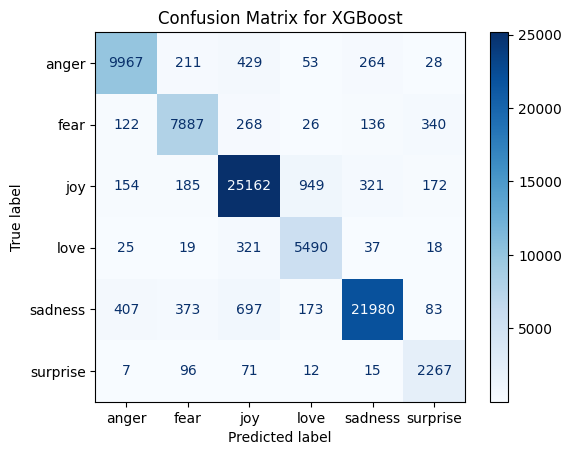

In [32]:
# Plot Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, xgb_model.predict(X_test_vectorized))
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=label_encoder.classes_)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [33]:
import joblib

# Save the trained model to a file
joblib.dump(xgb_model, 'Xg_Boost_model.pkl')

# Save the vectorizer and label encoder for later use
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [34]:
# Load the model, vectorizer, and label encoder
XG_model = joblib.load('Xg_Boost_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Now you can use the model to make predictions as before
texts = input("Enter Text Here: ")
texts = [texts]
texts_vectorized = vectorizer.transform(texts)
predictions = XG_model.predict(texts_vectorized)
predicted_emotions = label_encoder.inverse_transform(predictions)

print(f'Text: "{texts[0]}" -> Predicted Emotion: {predicted_emotions[0]}')


Enter Text Here: i am good
Text: "i am good" -> Predicted Emotion: joy
